In [17]:
import keras

In [18]:
model = keras.models.load_model('./Model/six-shoes-model.h5')

### 실제 데이터 가져오기 - 타겟 아닌 것만

In [19]:
from PIL import Image

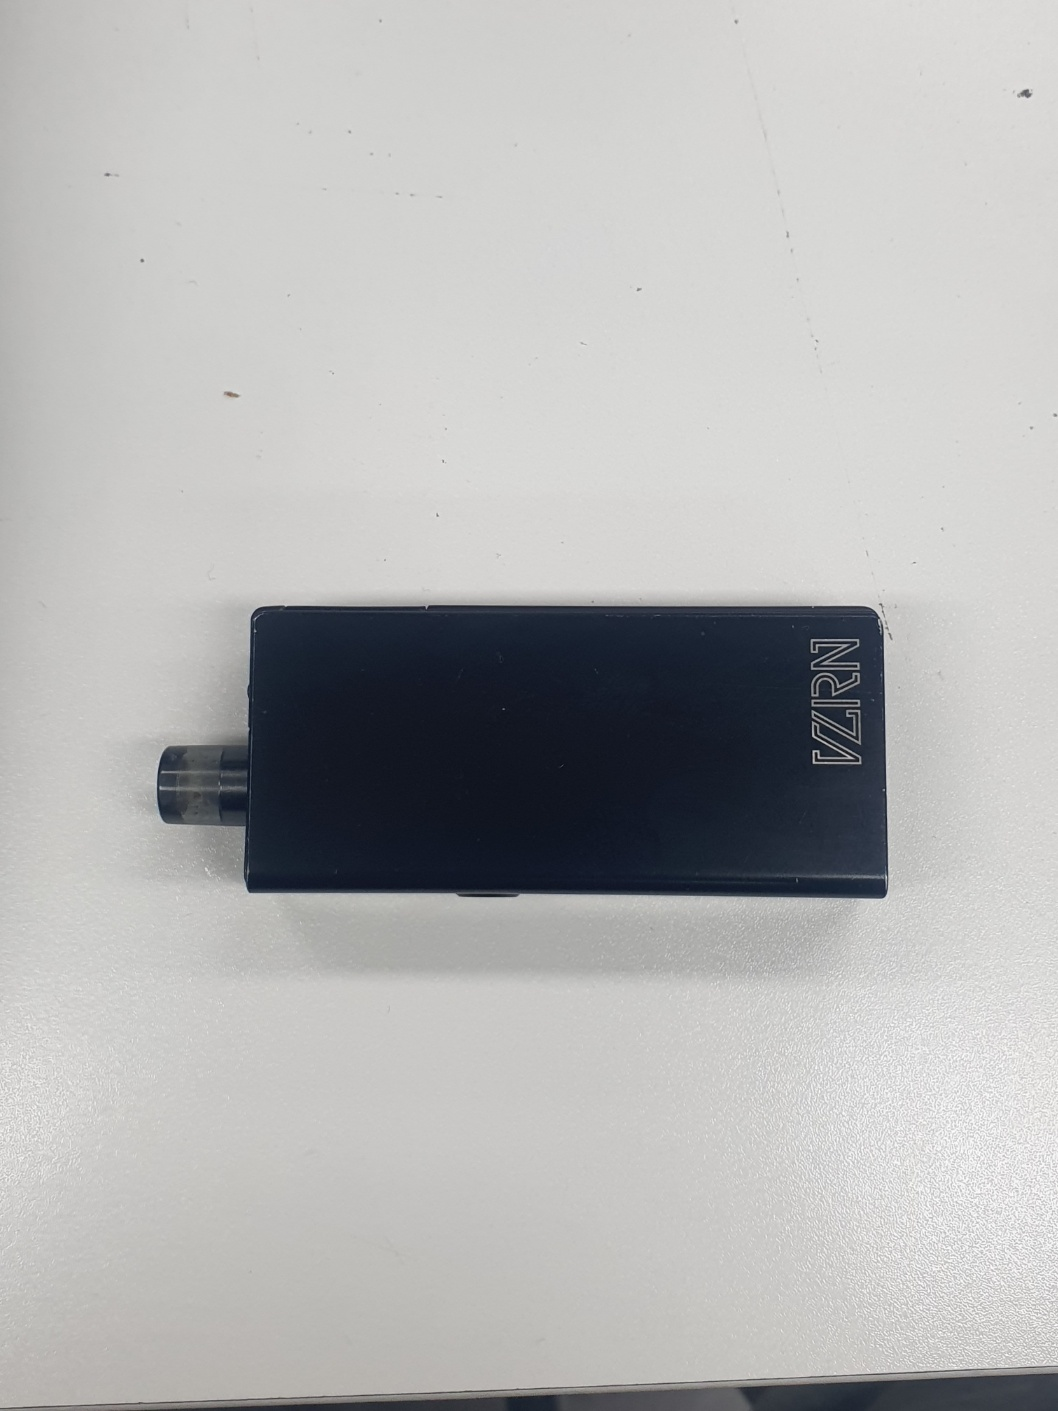

In [20]:
img = Image.open('./Data/real/tabaco.jpeg')
img

In [21]:
import numpy as np 

def png_to_jpg(img , fileName):
    img = img.resize((128,128))
    image = Image.new("RGBA",img.size,"WHITE")
    image.paste(img, mask=img)
    image.convert("RGB").save(f"./Data/{fileName}.jpg")
    print(np.array(image).shape)

In [22]:
# # png 일경우에만
# png_to_jpg(img,'test_5')
# img = Image.open('./Data/test_5.jpg')

In [23]:
img = img.resize((128,128))
imgArr = np.array(img,dtype=np.uint8)

In [24]:
imgArr = 255 - imgArr

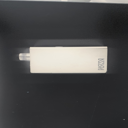

In [25]:
img = Image.fromarray(imgArr)
# img = img.transpose(Image.FLIP_LEFT_RIGHT)
img = img.transpose(Image.FLIP_TOP_BOTTOM)
img

In [26]:
imgArr = np.array(img,dtype=np.int32)

In [27]:
imgScaled = imgArr / 255.0

In [28]:
imgScaled.shape

(128, 128, 3)

In [29]:
imgScaled = imgScaled.reshape(-1,128,128,3)

In [30]:
ans = ['Adidas','Adidas','Converse','Converse','Nike','Nike']

In [31]:
value = model.predict(imgScaled)
print("예측력 : " ,value)
print("제일 높은 예측력 : ", ans[np.argmax(value)])

1/1 [==============================] - 0s 34ms/step
예측력 :  [[9.9986506e-01 7.1919421e-05 8.0189022e-10 6.2980398e-05 1.4411295e-08
  4.7881276e-08]]
제일 높은 예측력 :  Adidas
